# Lab 4: Working with 'real' data
Noah Kim
Section AC

In [4]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
matplotlib.rc('font', size=22)
matplotlib.rc('figure', figsize=(18, 10))

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

## Problem 1 
We are looking at the data from a gamma-ray satellite orbiting in low Earth orbit. It takes a reading of the number of particles detected every 100 milliseconds, and is in an approximately 90 minute orbit. While it is looking for gamma-ray bursts, virtually all of the particles detected are background cosmic rays.

In [5]:
hf = h5py.File('gammaray_lab4.h5', 'r')
hf.keys()
data = np.array(hf.get('data'))
hf.close()

For the purpose of my visualizations, I am going to be using the first 400,000 rows of data.  The columns are time (in gps seconds), Solar phase (deg) showing the position of the sun relative to the orbit, Earth longitude (deg) giving the position of the spacecraft relative to the ground, and particle counts

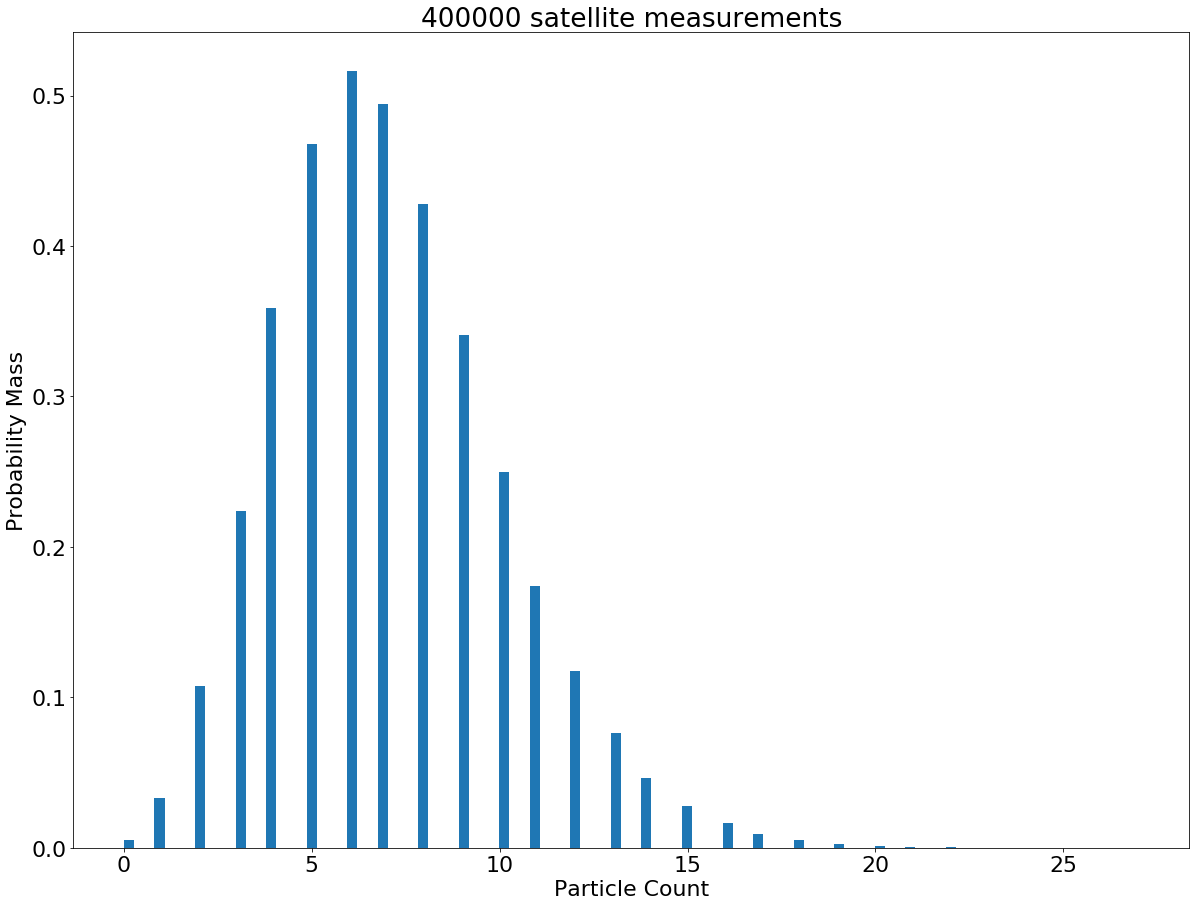

In [7]:
n=400000
plt.hist(data[3][0:n], bins=100, density= True);
plt.title('400000 satellite measurements')
plt.xlabel('Particle Count');
plt.ylabel('Probability Mass');

Plotting a histogram of the first 400,000 data plots I noticed that there is a tail onwards the right side of the distribution. This is indicative of a Rayleigh's distribution so I plan to build my background off of the Poisson's distribution initially.

Now in order to see whether or not there is any signal contamination I will make a few plots to study the data and look for any patterns or noticable trends. 

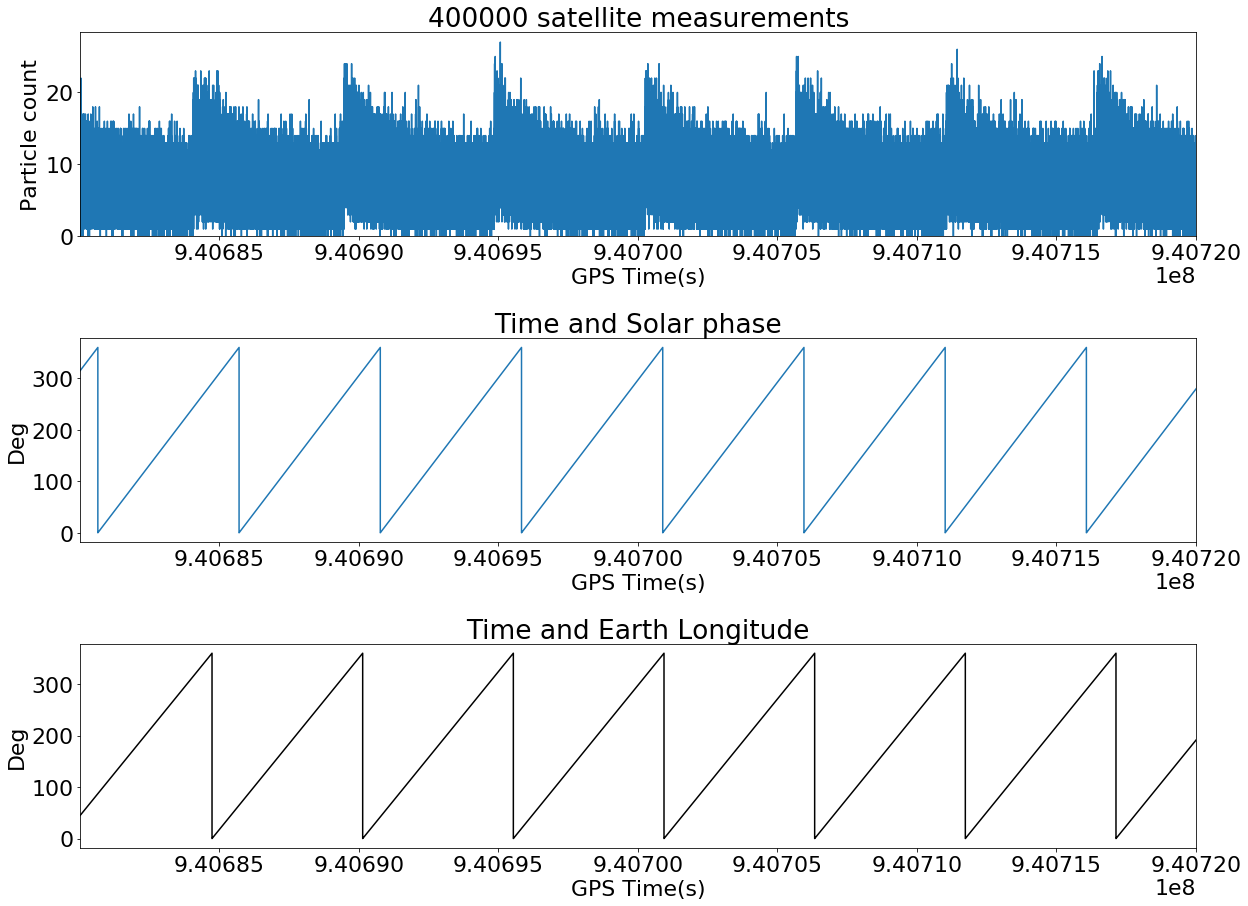

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
n = 400000
fig.subplots_adjust(hspace=0.5)
ax1.plot(data[0][0:n], data[3][0:n]);
ax1.set_xlim(data[0][0], data[0][n])
ax1.set_ylim(0, None);
ax1.set_title('400000 satellite measurements')
ax1.set_xlabel('GPS Time(s)');
ax1.set_ylabel('Particle count');

ax2.plot(data[0][0:n], data[1][0:n]);
ax2.set_title('Time and Solar phase')
ax2.set_xlabel('GPS Time(s)');
ax2.set_xlim(data[0][0], data[0][n])
ax2.set_ylabel('Deg')

ax3.plot(data[0][0:n], data[2][0:n],'k');
ax3.set_title('Time and Earth Longitude')
ax3.set_xlabel('GPS Time(s)');
ax3.set_xlim(data[0][0], data[0][n])
ax3.set_ylabel('Deg');

I plotted the three plots: Time and particle count, solar phase and time, and Earth longitude and time. From the given plots there indeed seems to be some signal contamination. Comparing Solar and time versus Time and count I noticed each peak at the same time which is aroung 5400 seconds. This is consistent since the number of particles detected every 100 milliseconds with an orbit of 90 minutes. 90 minutes is approximately 5400 seconds so they are consistent. The solar phase and time is not the source of signal contamination. The area I will look further into would be the Earth longitude and time as this one is not consistent in where we see the peaks where we see in time and solar phase, it must be where the data is getting contaminated. 

To show more clearly that Earth Longitude is where the signal contamination is occuring, I decided to create a 2D Histogram plot of both solar phase and Earth Longitude.

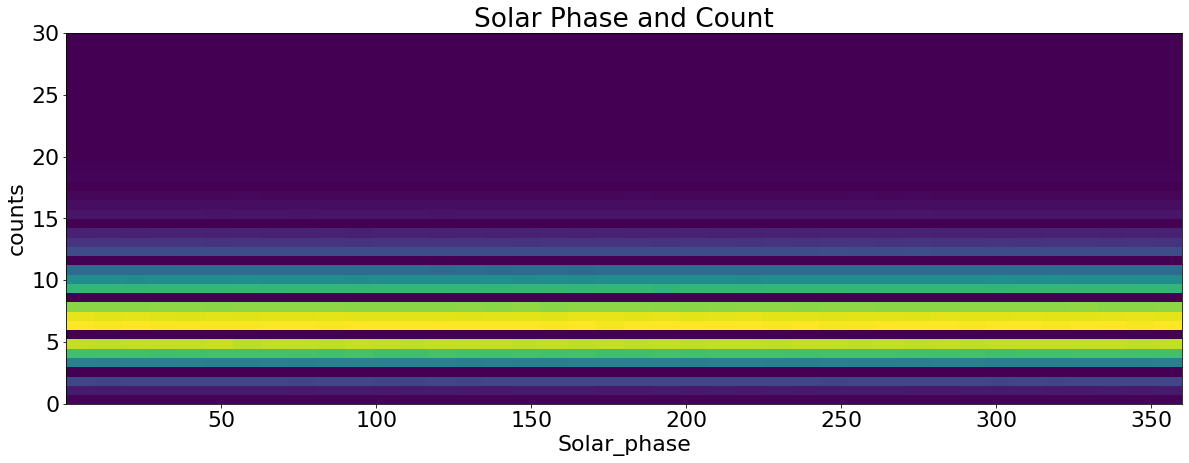

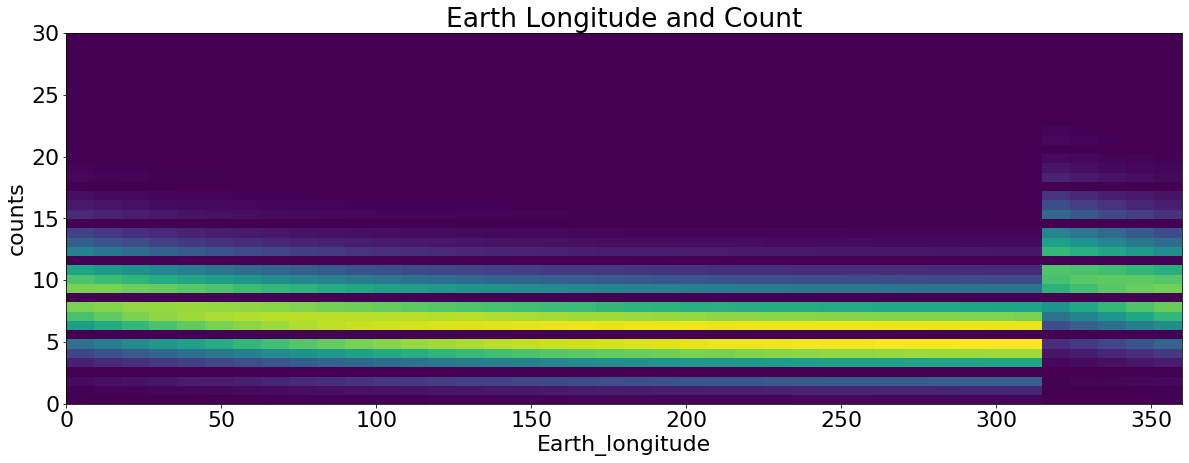

In [9]:
plt.subplot(2, 1, 1)
plt.xlabel('Solar_phase')
plt.ylabel('counts')
plt.hist2d(data[1], data[3], bins=(40, 40))
plt.title('Solar Phase and Count')
plt.show()
plt.subplot(2, 1, 2)
plt.xlabel('Earth_longitude')
plt.ylabel('counts')
plt.hist2d(data[2], data[3], bins=(40, 40))
plt.title('Earth Longitude and Count')
plt.show()

2) The background is not consistent across the dataset. Find and describe as accurately as you can how the background changes.

The background is not consistent across the dataset, this can be shown here in the two 2D histograms above. From the solar phase plotted against the count we see a consistent constant plot where the solar phase is consistent with the count. This is indicating that the solar phase has no effect on the signal background and so is not causing the signal contamination. On the other hand, we can see that the Earth longitude 2D histogram shows a varying from 0 to 360 degrees and the count do affect the background because if it weren't it would be more similar to the solar phase plot. Since we know that there is signal contamination due to the Earth longitude, we can conclude that the background will not be consistent across the dataset. The background will have different means at different points in longitude. For example, the brighter the color the more dense that location is. In the plot we can see at 0 the mean is at around 9, from 100 - 320 we see the mean drop to around 5, and at 340 we see the mean hovers around 11. The background will change because at different longitudes the mean will shift from values 4-11, with a constantly changing mean the background changes where it is locating and will have varying significant threshold values at different longitudes.

3) Create a model for the background that includes time dependence, and explicitly compare your model to the data. How good is your model of the background?

Initially I found that a Poisson's distribution to match the dataset so I will create a distribution model that has the mean located at the mean value of the whole count data column.

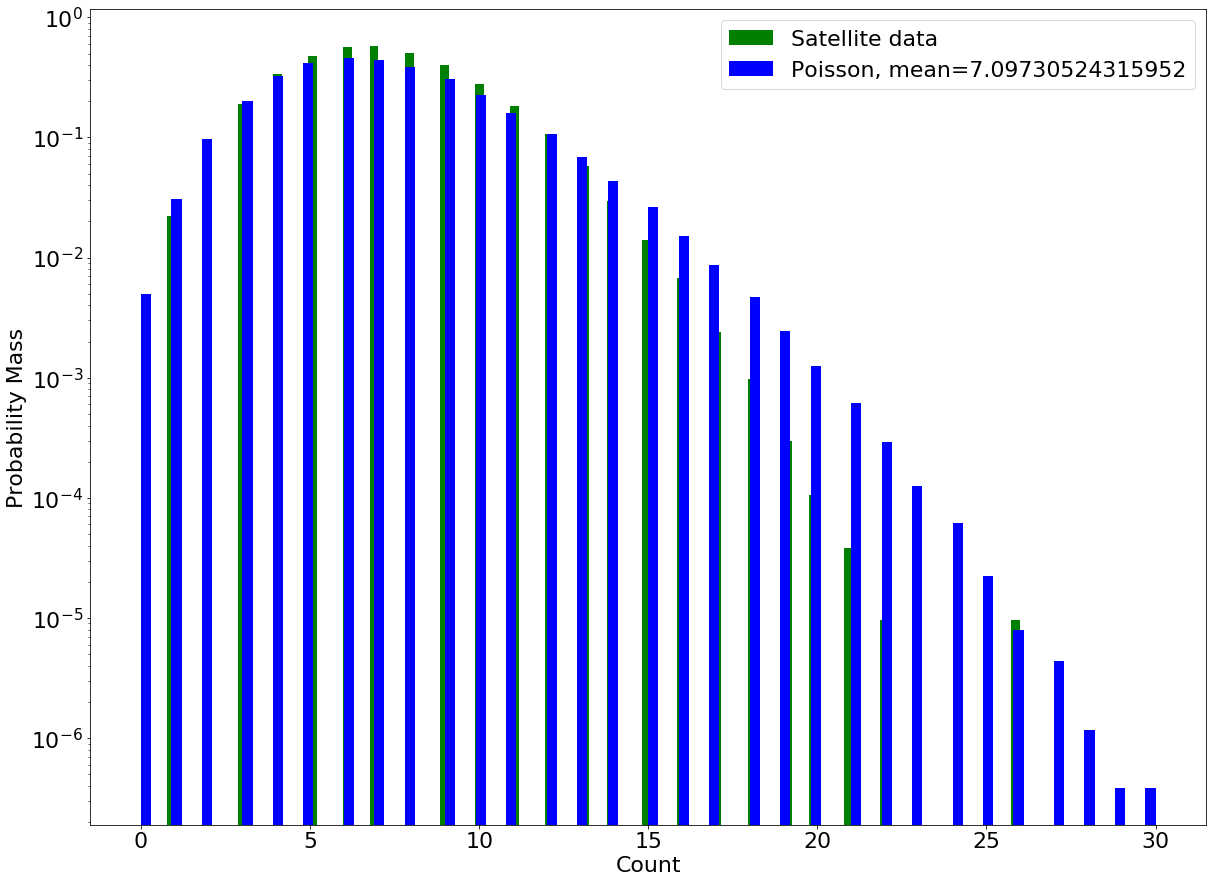

In [10]:
mu = np.mean(data[3])
pmf = stats.poisson(mu).rvs(n)
plt.yscale('log');
plt.xlabel('Count')
plt.ylabel('Probability Mass')
plt.hist(pmf, 100, density=True, color='g')
plt.hist(data[3], 100, density=True, color='b')
plt.legend(['Satellite data', f'Poisson, mean={mu}']);

Above I plotted my model and the GPS time and count over it to see how my model compares to that data. Overall my model fits the data well enough that it follows the same shape and trend but does have its faults. Although my model follows the general trend, you can see that at the peaks 5-11 the data has a higher probability mass than the model and the model has a higher probability mass the further the count gets 15 and beyond. This makes since because this distribution is for the mean of the entire data set. However as we discovered in question 2, the background is not consistent and so the model falls short because the model is IF the background was consistent. Comparing the data and model, it makes sense that the data falls towards these higher sigma values because it is much more rare to find significant discoveries in real life. This is also true for why the count values closer to the mean are higher for the data than the model, the data is much more likely to find data closer to the mean and not significant. 

Overall, my model more or less accurately compares to the datas trend and peaks with some differences.

4) Because the background varies, your discovery sensitivity threshold (how many particles you would need to see) also varies. What is the '5-sigma' threshold for a 100 millisecond GRB at different times?

In order to answer this I need to look more into the Earth Longitude versus count data because of the longitude is the source of contamination and the cause of the varied background. Below I created a plot that contains the mean value of the Earth Longitude and count and took the average of all of them from degrees 0 to 360.

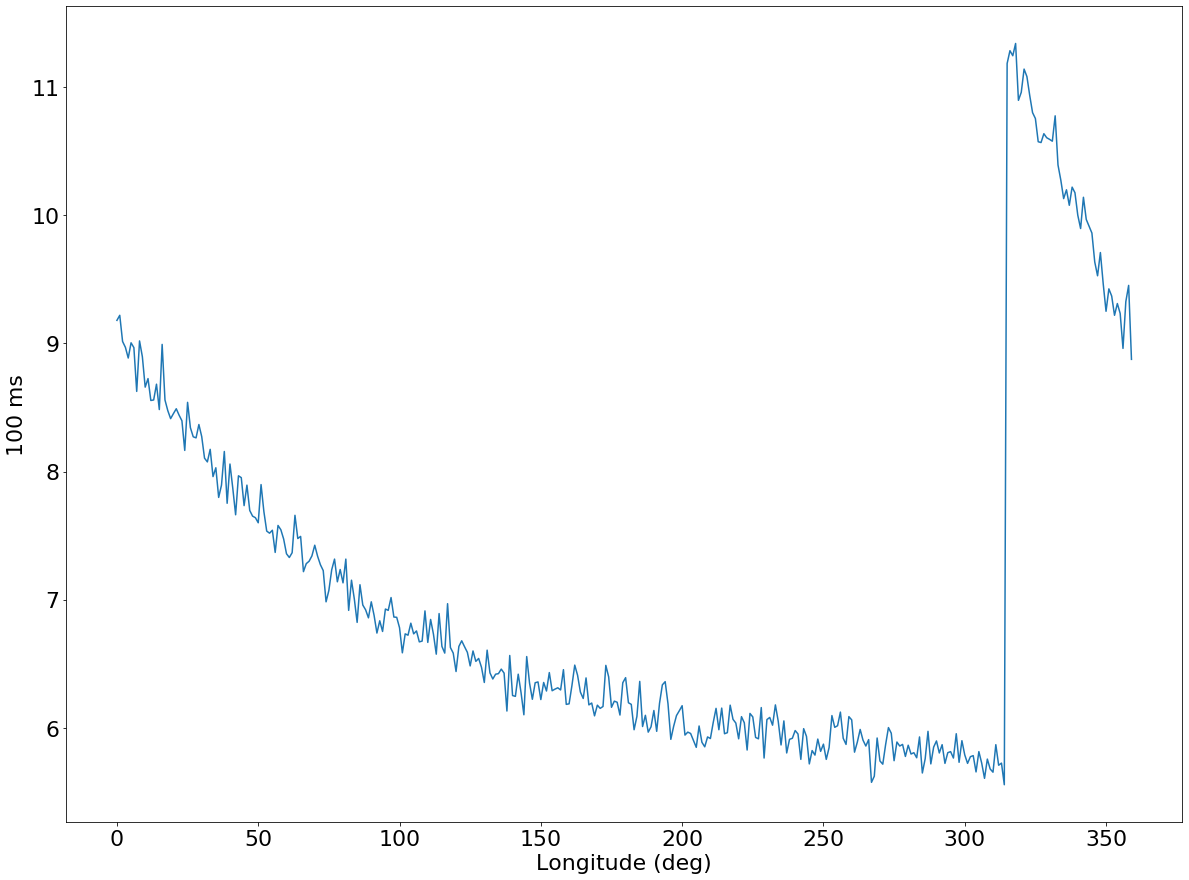

7.089283947408948

In [11]:
counts = data[3]
means = [np.mean(counts[data[2]==i]) for i in np.arange(360)]
plt.plot(np.arange(360), means)
plt.xlabel("Longitude (deg)")
plt.ylabel("100 ms")
plt.show()
np.mean(means)

For the purposes I will choose four values for my 5 sigma threshold for a 100 millisecond GRB at different times. The values I will be choosing are: 7.1 (the mean count), 9 (the value at around 0 longitude) 5.4 (the minimum value near 300) and 11.3 (when the longitude value spikes)

In [12]:
prob = 1 - stats.norm.cdf(5)

def calc_thresh(prob, mean):
    threshold = stats.poisson.ppf(1 - prob, mean)
    print(f"The threshold for a 100 millisecond GRB with mean {mean} is =", str(threshold))
calc_thresh(prob, 5.4)
calc_thresh(prob, 7.1)
calc_thresh(prob, 9)
calc_thresh(prob, 11.3)

The threshold for a 100 millisecond GRB with mean 5.4 is = 20.0
The threshold for a 100 millisecond GRB with mean 7.1 is = 24.0
The threshold for a 100 millisecond GRB with mean 9 is = 28.0
The threshold for a 100 millisecond GRB with mean 11.3 is = 32.0


As we can see above, as the longitude changes with time in its 360 degree cycle the 5$\sigma$ threshold value changes because the background varies due to the signal contamination caused by the Earth Longitude.

## Problem 2

For problem 2 we are looking at 10 images and looking for the faintest stars in these images. 

1) Dowload the data from images.h5. This is a stack of 10 square images, each 200 pixels on a side.

In [13]:
hf2= h5py.File('images.h5', 'r')
hf2.keys()
image = np.array(hf2.get('image1'))
imagestack = np.array(hf2.get('imagestack'))
print(np.shape(imagestack))
hf2.close()

(200, 200, 10)


2) Explore the data. Is there signal contamination? Is the background time dependent? Is it consistent spatially? Develop a plan to calculate your background pdf().

In order to check if the background time is consistent spatially or time dependent, I plotted the sum of rows and columns of one image.

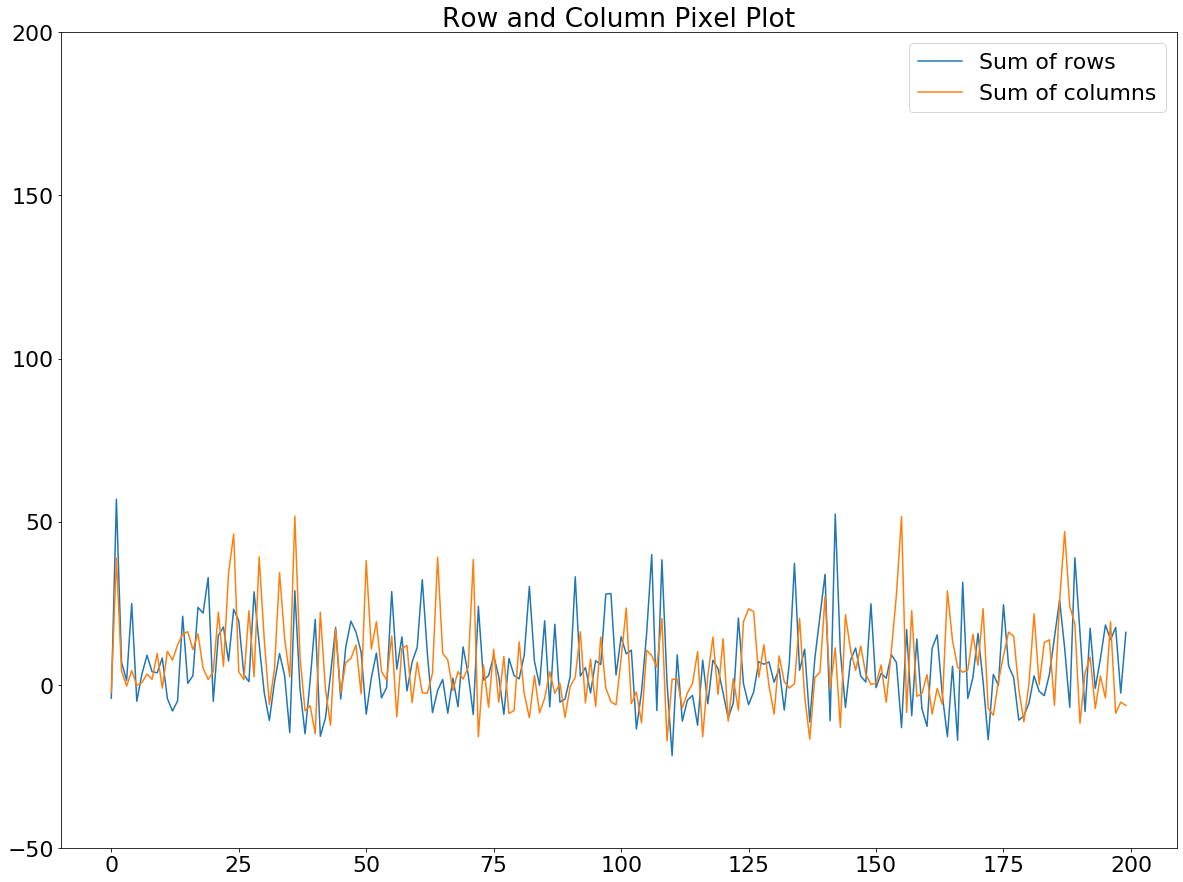

In [14]:
row_sum = np.sum(imagestack[:,:,0], 0)
col_sum = np.sum(imagestack[:,:,0], 1)
plt.plot(row_sum)
plt.plot(col_sum)
plt.ylim(-50,200)
plt.title('Row and Column Pixel Plot')
plt.legend(['Sum of rows','Sum of columns']);

Looking at the plot above, the data seems to be more or less evenly distributed and consistent as we get through the 200 pixels. Since I took the sum of the columns and rows and they are more or less evenly distributed I can claim that the data is spatially consistent. As  for whether or not the background is time dependent. I cannot determine if it is or is not because we are only given 10 images and the lab does not specify the time between each image. 

As for determining whether or not the images have signal contamination, using the flatten function, I will create a histogram of a telescope image and plot it.

-0.003167586768696385 0.5616091705025514


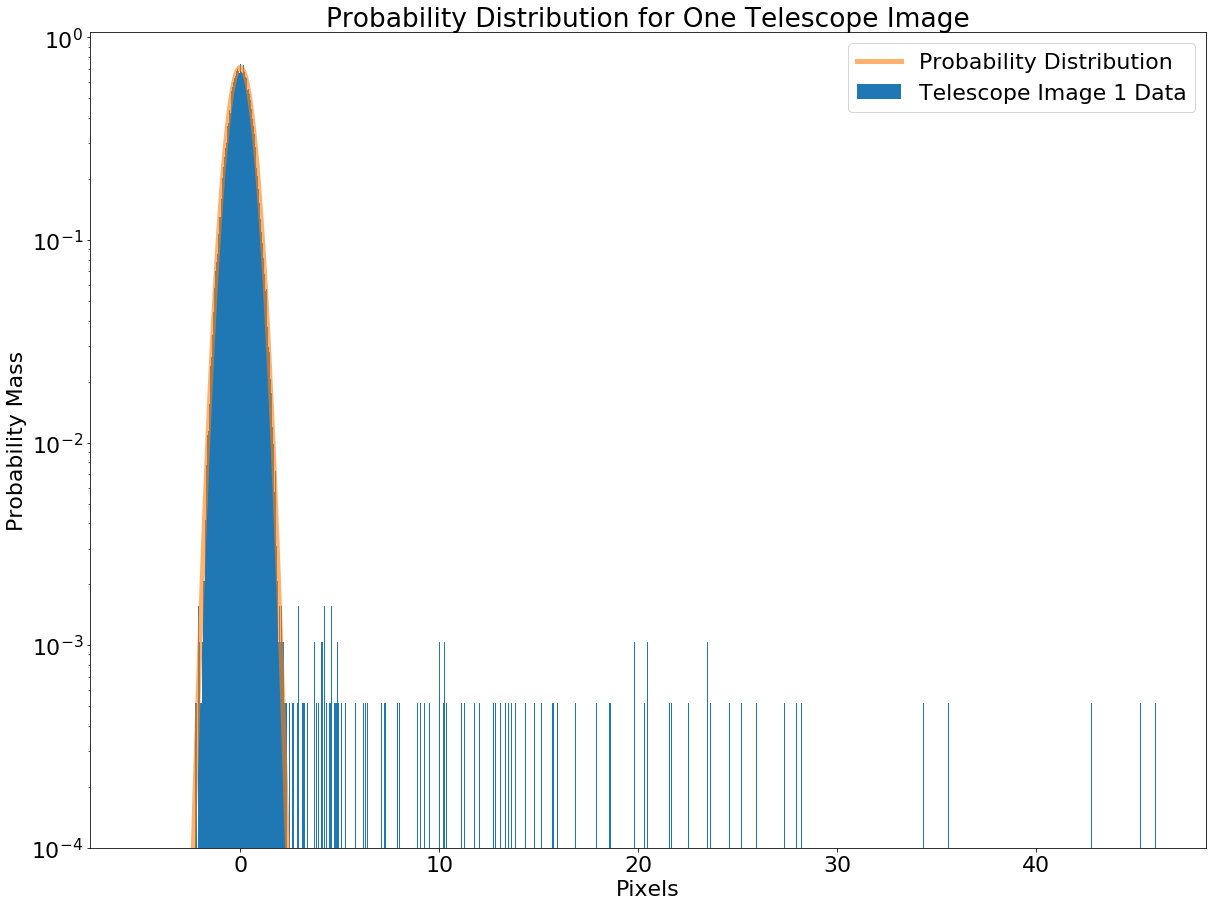

In [15]:
x = imagestack[:,:,0].flatten()
plt.yscale('log')
plt.hist(x, bins=1000, density = True);
y = x[x < 2]
mean = np.mean(y)
std = np.std(y)
x = np.linspace(-5,5,1000)
dist = stats.norm(mean, std)
pdf = dist.pdf(x)
print(mean, std)
plt.ylim(1e-4, None)
plt.plot(x, pdf, linewidth = 5, alpha = 0.6)
plt.xlabel('Pixels');
plt.ylabel('Probability Mass');
plt.title('Probability Distribution for One Telescope Image')
plt.legend(['Probability Distribution','Telescope Image 1 Data']);

The distribution of a single image appears to be Gaussian so I will use this as a starting point to create my background pdf. Signal contamination is present as the values goes past 10 and more so we see values that don't seem to fit the Gaussian distribution that is centered near 0. 

Looking at the standard deviation for one image is really high of around 0.56 so if I were to create my background pdf I would want to use the average of all 10 images (trials factor) in order to create a distribution. This will shrink the standard deviation and since we are looking for the faintest stars it is easier to find a discovery when we shrink the standard deviation.
This is under the assumption that the background is not time dependent and all images were taken at similar times. 

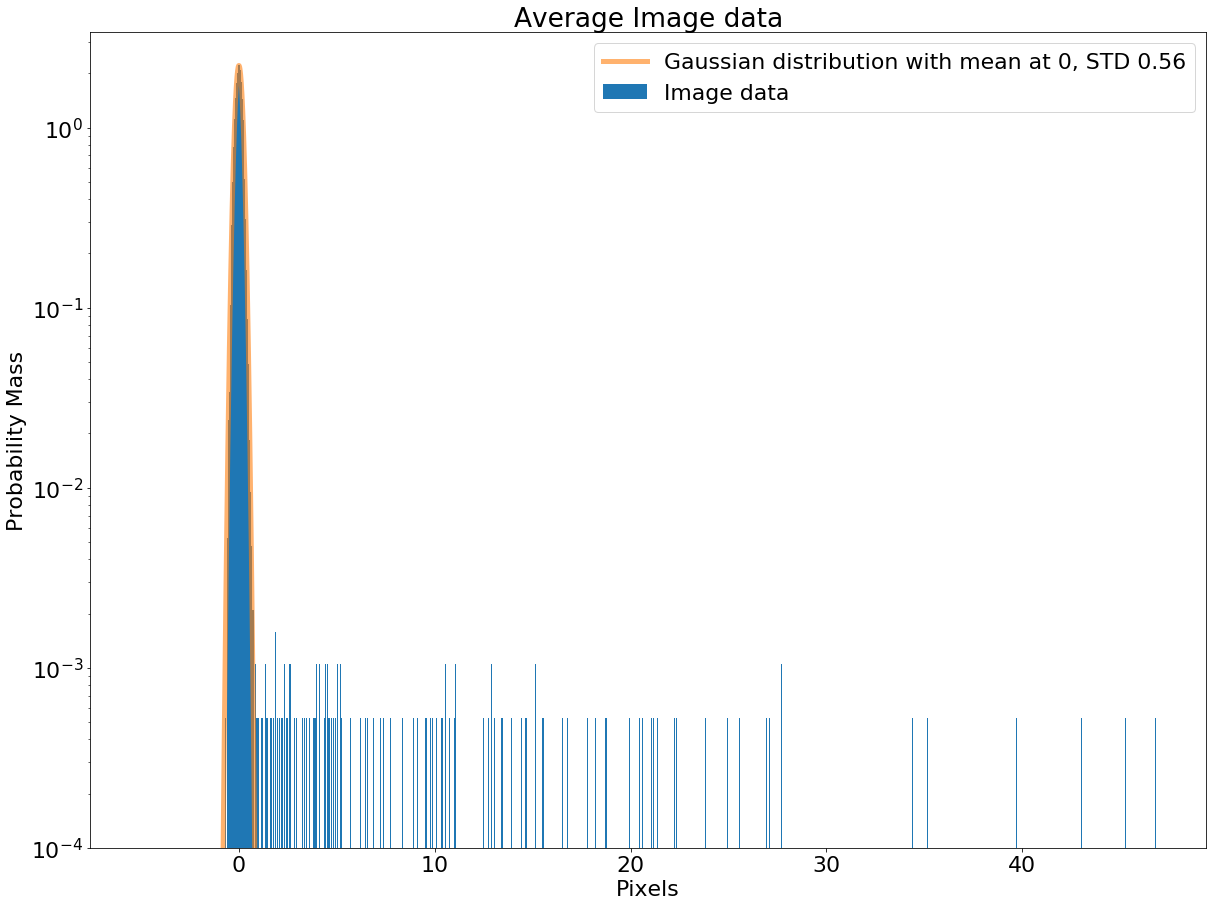

In [16]:
plt.yscale('log')
img_avg = np.mean(imagestack, axis =2)
x = img_avg.flatten()
plt.hist(x, bins=1000, density=True);

y = x[x < 2]
avg_mean = np.mean(y)
avg_std = np.std(y)
x = np.linspace(-5,5,1000)
dist = stats.norm(avg_mean, avg_std)
pdf = dist.pdf(x)
plt.ylim(1e-4, None)
plt.plot(x, pdf, linewidth = 5, alpha = 0.6)
plt.title('Average Image data')
plt.ylabel('Probability Mass')
plt.xlabel('Pixels')
plt.legend([f'Gaussian distribution with mean at 0, STD {std.round(2)}', 'Image data']);

3) Using your background distribution, hunt for your signal (either faint stars, or a transient). Describe what you find.


If I were to hunt for a signal of faint stars, this sounds similar to finding if a value is statistically significant (a discovery) so I will be finding the threshold of 5$\sigma$ in order to find which stars are the faintest. 

In [17]:
prob = 1 - stats.norm.cdf(5)
print(prob)
threshold = stats.norm.ppf(1 - prob, avg_mean, avg_std)
print(threshold)

2.866515719235352e-07
0.9024553332103131


This threshold gives me the 5 sigma significance of the _Average_. In line with the trials factor average normally I would divide the prob by the number of trials but in this case I am keeping it as is because of the distribution i created above was made FOR the averages and the mean and SD were calculating using the average values. This doesn't necessarily mean that individual images can't claim a significance with a value of 0.9 threshold it is still possible but when we see if a value is greater than or less than the average value threshold we can claim significance.

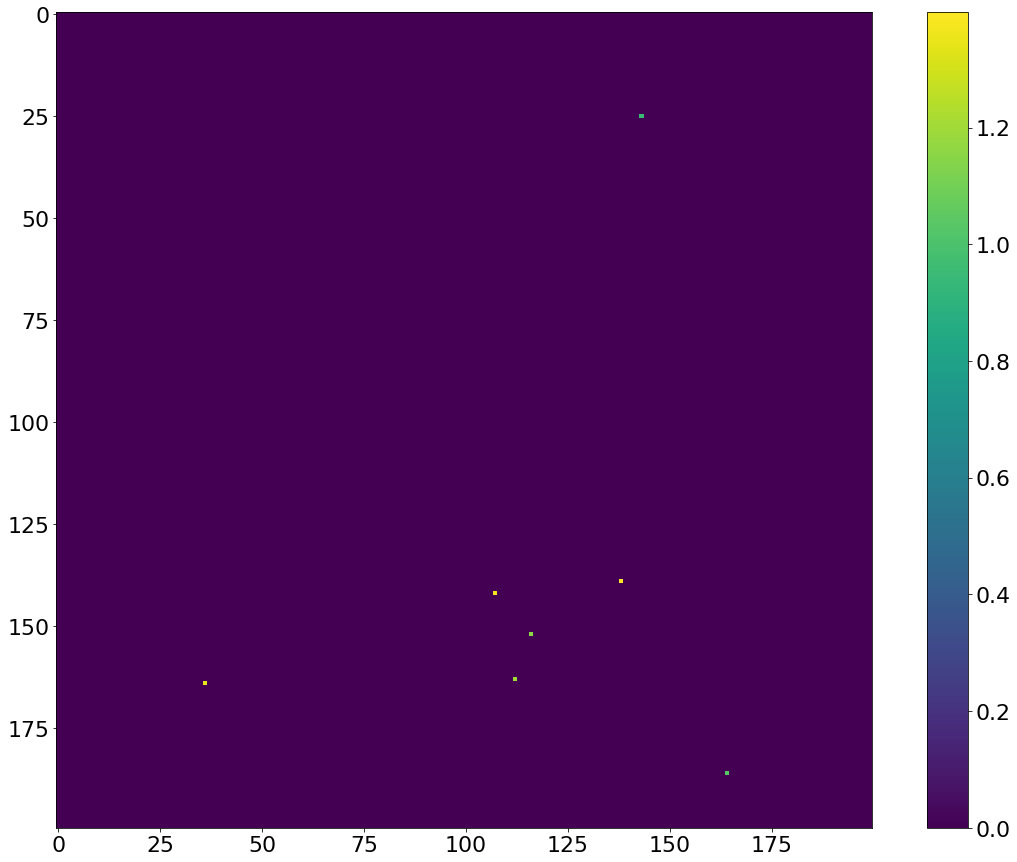

In [18]:
#I picked an arbitrary value of 0.5 because img_avg < threshold gives me a plot of 0. faintest_values are checking to see if there are any stars that are above the 5 sigma threshold 
# and checks to see if it is below 5 sigma value giving true or false responses (essentially filtering out the stars that obviously are not the faintest (bright stars))
#multiplying the img_avg by the faintest_values gives me a small list of stars that fit that category
# of 5 sigma significance.
faintest_values = (img_avg > threshold) & (img_avg < threshold + 0.5)
plt.imshow(img_avg * faintest_values)
cbar = plt.colorbar()

We found that there are 7 stars that fall in the category of _faint_ stars that is there are 7 stars that fall in the 5$\sigma$ discovery range, having the faintest one being around (160,25) coordinate point. 

4) You and your lab partner had different pdf(), but were using the same data. Explore why this is.

Me and my lab partner had different pdf()s even though we were using the same data. This is because we were trying to achieve different things. My lab partner was trying to find bright Transient events (supernovas). In my case, I was only looking for what stars were the faintest and so the method I used was the trials factors. I averaged all 10 images and tried to filter out all the points that did not fit in my 5$\sigma$ range of discovery. My lab partner is comparing the differences between each image while I was filtering out data using the trials factor. his PDF was different from the background for a single image, since the background for the sum or difference of two images will have a larger standard deviation, equal to $\sigma_k = \sqrt{\sigma_i^2 + \sigma_j^2}$. Thus, his $5\sigma$ threshold will be larger, since the value of $5\sigma$ is larger.